## Single-cell RNA-seq analysis

Today, we will guide you through the workflow for analyzing scRNA-seq count matrices in Python. As single cell methods are relatively new, there is not one “correct” approach to analyzing these data; however, certain steps have become accepted as a sort of standard practice. A useful overview on the current best practices is found in the article below, which we borrow from in this tutorial.

Current best practices in single-cell RNA-seq analysis: a tutorial: https://www.embopress.org/doi/full/10.15252/msb.20188746

As a framework for conducting these analyses, we will use the Python package scanpy, for which there is excellent documentation and even some online tutorials: https://scanpy.readthedocs.io/

Another useful resource is the following guide:  
https://chanzuckerberg.github.io/scRNA-python-workshop/intro/about

## 0. Load scanpy and create the AnnData object

First, we import the necessary packages and (optionally) adjust some visualization settings:


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.logging.print_versions(file=None)

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
brotli                      1.1.0
certifi                     2024.06.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.0
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
importlib_resources         NA
ipykernel                   6.29.3
isoduration                 NA
jedi    

In [3]:
print(np.__version__)

1.23.5


In [4]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.logging.print_header()

/home/mako/miniforge3/envs/mkpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.23.5 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 pynndescent==0.5.12


We will load the data directly from an AnnData object we have prepared for you!

In [5]:
adata = sc.read_h5ad("/home/mako/PE/adata_final_Immune_raw_norm_blank_Copy.h5ad") # enter h5ad file name here

The AnnData object contains a lot of information and is essentially a fancy pandas dataframe! Some basic commands to view the object are shown below (for a fully annotated dataset).

Try to understand what is an Anndata object before moving into the analysis. Useful schematics:  
https://anndata.readthedocs.io/en/latest/#  
https://cellgeni.readthedocs.io/en/latest/visualisations.html

Refer to these schematics often while programming. There's a lot of information storen in an Anndata object/file. 


In [6]:
print(adata) # prints an overview of information on the AnnData object

AnnData object with n_obs × n_vars = 1420 × 20901
    obs: 'injury', 'day', 'collection_region', 'injury_day', 'injury_region', 'injury_condition', 'nuclei_uL', 'total_nuclei', 'target_10x', 'mouse_id', 'date_nuclei_extraction', 'sample_id', 'sample_I15AC', 'sample_I15AR', 'sample_I15BC', 'sample_I15CC', 'sample_I15CR', 'sample_I60AC', 'sample_I60AR', 'sample_I60BC', 'sample_I60BR', 'sample_I60CC', 'sample_I60CR', 'sample_S15AC', 'sample_S15BC', 'sample_S15BR', 'sample_S15CC', 'sample_S15CR', 'sample_U00AX', 'sample_U00BX', 'sample_U00CX', 'n_counts', 'filt_counts', 'n_genes', 'filt_genes', 'percent_mito', 'filt_mito', 'doublet_score', 'predicted_doublet', 'doublet', 'annot_lineage_cell', 'leiden_n15_r0.1', 'leiden_n15_r0.2', 'leiden_n15_r0.3', 'leiden_n15_r0.4', 'leiden_n15_r0.5', 'leiden_n15_r0.6', 'leiden_n15_r0.7', 'leiden_n15_r0.8', 'leiden_n15_r0.9', 'leiden_n15_r1', 'leiden_n15_r1.1', 'leiden_n15_r1.2', 'leiden_n15_r1.3', 'leiden_n15_r1.4', 'leiden_n15_r1.5', 'leiden_n15_r2'
   

In [7]:
print(adata.X) # view the count matrix (rows x columns, cells x genes)

  (0, 0)	0.4806647300720215
  (0, 12)	0.9712116718292236
  (0, 17)	0.5242154598236084
  (0, 24)	0.5162976384162903
  (0, 31)	0.3114610016345978
  (0, 38)	0.9153690338134766
  (0, 54)	0.20437897741794586
  (0, 85)	0.44116339087486267
  (0, 109)	1.8407469987869263
  (0, 133)	0.4268164336681366
  (0, 143)	0.9420980215072632
  (0, 147)	0.5574523210525513
  (0, 153)	0.49958688020706177
  (0, 158)	0.9530327320098877
  (0, 159)	1.2326185703277588
  (0, 197)	0.2828541398048401
  (0, 203)	1.005621075630188
  (0, 220)	1.8576418161392212
  (0, 228)	1.1537764072418213
  (0, 244)	0.022480865940451622
  (0, 248)	0.44560548663139343
  (0, 249)	1.0055698156356812
  (0, 251)	0.31165045499801636
  (0, 253)	0.3353593647480011
  (0, 260)	1.2917616367340088
  :	:
  (1419, 20696)	0.8262499570846558
  (1419, 20750)	0.4792506694793701
  (1419, 20752)	0.48795250058174133
  (1419, 20768)	0.4846520721912384
  (1419, 20792)	0.4896607995033264
  (1419, 20803)	0.4464294910430908
  (1419, 20828)	0.8295174837112427
 

In [8]:
# Question: how do many cells do I have? how many genes do I have?

# 1420 cells and 20901 genes

In [9]:
print(adata.obs.head())# view a pandas data frame containing metadata on the cells

                        injury  day collection_region   injury_day  \
AACCACACAGATTCGT-8     injured   60            caudal   injured_60   
TCTACATTCGACCACG-14       sham   15           rostral      sham_15   
TGCACGGTCCATTCAT-18  uninjured    0           central  uninjured_0   
AACCACACAGGCATTT-4     injured   15            caudal   injured_15   
GTCAGCGAGGCGATAC-3     injured   15            caudal   injured_15   

                         injury_region     injury_condition  nuclei_uL  \
AACCACACAGATTCGT-8      injured_caudal    injured_60_caudal        825   
TCTACATTCGACCACG-14       sham_rostral      sham_15_rostral        480   
TGCACGGTCCATTCAT-18  uninjured_central  uninjured_0_central        615   
AACCACACAGGCATTT-4      injured_caudal    injured_15_caudal        930   
GTCAGCGAGGCGATAC-3      injured_caudal    injured_15_caudal        705   

                     total_nuclei  target_10x                mouse_id  ...  \
AACCACACAGATTCGT-8         127875       10000   RL19319;

In [10]:
print(adata.obsm.keys())
print(adata.obsm['X_umap'][:5])  # Print the first 5 cells' Umap coordinates

KeysView(AxisArrays with keys: X_tsne, X_umap, X_umap_neighbors_n15)
[[11.237845   7.7318187]
 [11.118536   9.196877 ]
 [11.694567  10.184134 ]
 [10.876446  13.374867 ]
 [ 3.855518  10.409214 ]]


In [11]:
print(adata.var.head()) # view a pandas data frame containing metadata on the genes

       gene_ids    feature_types  genome     ensembl_gene_id   mito  n_cells
Xkr4       Xkr4  Gene Expression  GRCm38  ENSMUSG00000051951  False    72051
Gm1992   Gm1992  Gene Expression  GRCm38  ENSMUSG00000089699  False     4222
Rp1         Rp1  Gene Expression  GRCm38  ENSMUSG00000025900  False      317
Sox17     Sox17  Gene Expression  GRCm38  ENSMUSG00000025902  False      234
Mrpl15   Mrpl15  Gene Expression  GRCm38  ENSMUSG00000033845  False     5124


How many and which samples are inside your Anndata?

In [12]:
# Your code here

#print(adata.obs)
print(adata.obs.columns)

samples = adata.obs['sample_id'].unique()
num_samples = len(samples)

print(f"{num_samples} unique samples")
print(samples)

Index(['injury', 'day', 'collection_region', 'injury_day', 'injury_region',
       'injury_condition', 'nuclei_uL', 'total_nuclei', 'target_10x',
       'mouse_id', 'date_nuclei_extraction', 'sample_id', 'sample_I15AC',
       'sample_I15AR', 'sample_I15BC', 'sample_I15CC', 'sample_I15CR',
       'sample_I60AC', 'sample_I60AR', 'sample_I60BC', 'sample_I60BR',
       'sample_I60CC', 'sample_I60CR', 'sample_S15AC', 'sample_S15BC',
       'sample_S15BR', 'sample_S15CC', 'sample_S15CR', 'sample_U00AX',
       'sample_U00BX', 'sample_U00CX', 'n_counts', 'filt_counts', 'n_genes',
       'filt_genes', 'percent_mito', 'filt_mito', 'doublet_score',
       'predicted_doublet', 'doublet', 'annot_lineage_cell', 'leiden_n15_r0.1',
       'leiden_n15_r0.2', 'leiden_n15_r0.3', 'leiden_n15_r0.4',
       'leiden_n15_r0.5', 'leiden_n15_r0.6', 'leiden_n15_r0.7',
       'leiden_n15_r0.8', 'leiden_n15_r0.9', 'leiden_n15_r1',
       'leiden_n15_r1.1', 'leiden_n15_r1.2', 'leiden_n15_r1.3',
       'leiden_n15

How many cells from each category of 'injury' annotation are there? Hint: if we want cell-associated annotations/metadata, we should look into .obs to solve the problem

In [13]:
# Your code here

injury = adata.obs['injury'].value_counts()
injury_total = adata.obs['injury'].count()


print(injury)
print(f"Total number of injuries: {injury_total}")

injury
injured      964
sham         351
uninjured    105
Name: count, dtype: int64
Total number of injuries: 1420


How many cells from each category of 'day' are there?

In [14]:
# Your code here

day = adata.obs['day'].value_counts()
day_total = adata.obs['day'].count()

print(day)
print(f"Total number of days: {day_total}")

# day = adata.obs['date_nuclei_extraction'].value_counts()
# day_total = adata.obs['day'].count()

# print(day)
# print(f"Total number of days: {len(day_total)}")

day
15    1022
60     293
0      105
Name: count, dtype: int64
Total number of days: 1420


How many cells from each category of 'injury_day' are there?

In [15]:
# Your code here

injury_days = adata.obs['injury_day'].value_counts()
print(injury_days)

injury_day
injured_15     671
sham_15        351
injured_60     293
uninjured_0    105
Name: count, dtype: int64


What is the mean expression of "Gapdh" in the entire data set?

In [16]:
# Your code here

# Layers
# adata.layers["log_transformed"] = np.log1p(adata.X)

# print(adata.to_df(layer="log_transformed")) # We see that the .obs_names/.var_names are used in the creation of this Pandas object.

# flatten converts the 2D array (which has one column in this case) into a 1D array. This step ensures that the expression values are in a simple 1D numpy array, which is easier to work with for further calculations like computing the mean.

GapdhgeneList = adata[:, 'Gapdh'].X.toarray().mean()

#or

#GapdhgeneList = adata[:, 'Gapdh'].X.toarray().flatten().mean()

Gapdhgene = adata[:, 'Gapdh'].X.mean()

print(GapdhgeneList,Gapdhgene)

#mean_gapdh_expression = GapdhgeneList.mean()

#print (mean_gapdh_expression) 

# OR

# if "Gapdh" in adata.var['gene_ids'].values:
#     # Get the index of Gapdh
#     gapdh_index = adata.var[adata.var['gene_ids'] == "Gapdh"].index[0]
    
#     # Gene expression values
#     gapdh_expression = adata[:, gapdh_index].X.toarray().flatten()
    
#     # Mean expression of Gapdh
#     mean_gapdh_expression = gapdh_expression.mean()

#     print (mean_gapdh_expression)

# OR

# if "Gapdh" in adata.var.index:
#     # Directly access the "Gapdh" gene using its name
#     gapdh_expression = adata[:, 'Gapdh'].X.toarray().flatten()
    
#     # Calculate the mean expression of "Gapdh"
#     mean_gapdh_expression = gapdh_expression.mean()
    
#     print(f"The mean expression of 'Gapdh' in the entire dataset is {mean_gapdh_expression:.4f}")
# else:
#     print("Gene 'Gapdh' not found in the dataset.")41


0.01133547 0.011335471


In which cell is the highest expression of the gene "Gapdh" found? And the lowest?

In [17]:
# Your code here

#Gapdhgene = adata[:, 'Gapdh'].X.toarray().flatten()

Gapdhgene = adata[:, 'Gapdh'].X

max_index = np.argmax(Gapdhgene)
min_index = np.argmin(Gapdhgene)

print(max_index)
print(min_index)

max_cell = adata.obs_names[max_index]
min_cell = adata.obs_names[min_index]

print(max_cell)
print(min_cell)

667
0
GTGAGGATCAGGTGTT-5
AACCACACAGATTCGT-8


In which cluster (resolution 0.7) is the mean expression of the gene "Gpnmb" the highest? Note: later on you may plot this in a dotplot and confirm these results

In [18]:
# Your code here

Gpnmbgene = adata[:, ['Gpnmb','Gapdh']].X.toarray()

print(Gpnmbgene[-4:])
#print(adata.obs.columns)

zeroseven = adata.obs['leiden_n15_r0.7']

print(zeroseven)

adata.obs[['Gpnmb_expression','Gapdh_expression']] = Gpnmbgene # add Gpnmbgene in obs

print(adata.obs['Gpnmb_expression'])
print(adata.obs['Gapdh_expression'])

#print(adata.obs.columns)

cluster_means = adata.obs.groupby('leiden_n15_r0.7')['Gpnmb_expression'].mean() # pics que 0.7 resolution and group and combain every data from that resolution in the expression values of Gpnmb and returns the mean 
#print(cluster_means)


max_cluster = cluster_means.idxmax()
print(f"The cluster with the max expression is {max_cluster}")

min_cluster = cluster_means.idxmin()
print(f"The cluster with the min expression is {min_cluster}")


# Perguntas: quando saco as informações de expressao do X para o gene Gpnmb, posso diretamente transpolas para o data set do obs, isso não vai alterar a ordem delas ns? Ou seja para resolver isto, os dados de gene expression e os dados dos clusters têm de estar smp no mesmo df

[[2.24853 0.     ]
 [0.      0.     ]
 [0.      0.     ]
 [0.      0.     ]]
AACCACACAGATTCGT-8     1
TCTACATTCGACCACG-14    1
TGCACGGTCCATTCAT-18    0
AACCACACAGGCATTT-4     0
GTCAGCGAGGCGATAC-3     4
                      ..
ACACTGACAGCTCCTT-8     0
TGTTCCGGTAGGGAGG-7     2
CTGTACCGTGCGAACA-16    1
CTACAGACAAGCACAG-8     3
GGTGGCTCATTACGGT-12    0
Name: leiden_n15_r0.7, Length: 1420, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']
AACCACACAGATTCGT-8     0.000000
TCTACATTCGACCACG-14    0.000000
TGCACGGTCCATTCAT-18    0.000000
AACCACACAGGCATTT-4     0.946548
GTCAGCGAGGCGATAC-3     0.000000
                         ...   
ACACTGACAGCTCCTT-8     0.000000
TGTTCCGGTAGGGAGG-7     2.248530
CTGTACCGTGCGAACA-16    0.000000
CTACAGACAAGCACAG-8     0.000000
GGTGGCTCATTACGGT-12    0.000000
Name: Gpnmb_expression, Length: 1420, dtype: float32
AACCACACAGATTCGT-8     0.0
TCTACATTCGACCACG-14    0.0
TGCACGGTCCATTCAT-18    0.0
AACCACACAGGCATTT-4     0.0
GTCAGCGAGGCGATAC-3    

/tmp/ipykernel_692/1654302558.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = adata.obs.groupby('leiden_n15_r0.7')['Gpnmb_expression'].mean() # pics que 0.7 resolution and group and combain every data from that resolution in the expression values of Gpnmb and returns the mean


In [19]:
# df = pd.DataFrame({'Gpnmb_expression': Gpnmbgene, 'cluster': zeroseven})

# print(df)

#como isto fica certinho?126

## 1. Vizualize clusters

How many resolutions were defined?

In [20]:
# Your code here
        
#print(adata.obs.columns)

different_reso = []

for reso in adata.obs.columns: 
    if reso.startswith('leiden_'):
        different_reso.append(reso)

print(len(different_reso))



16


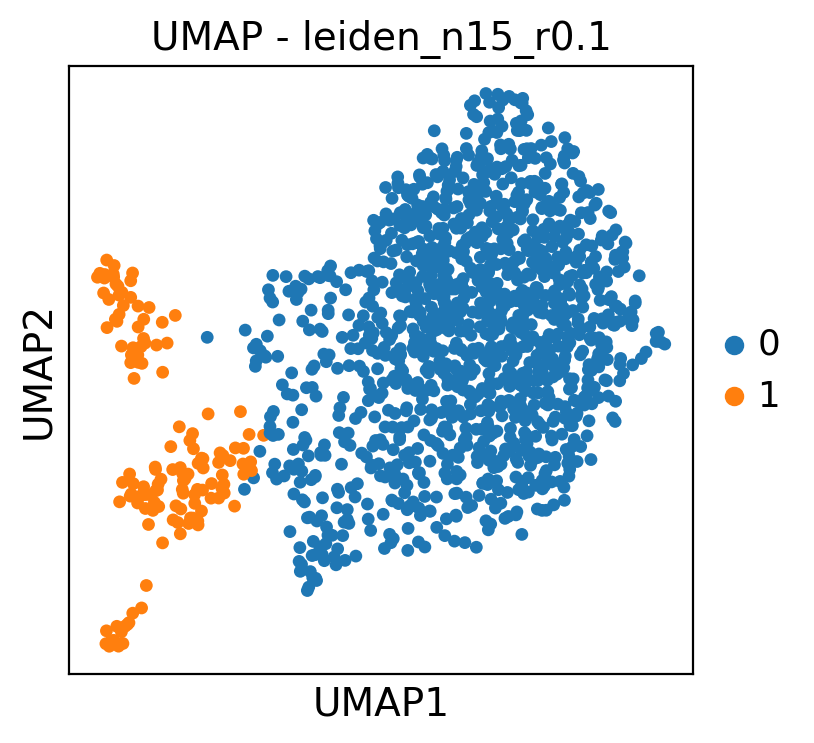

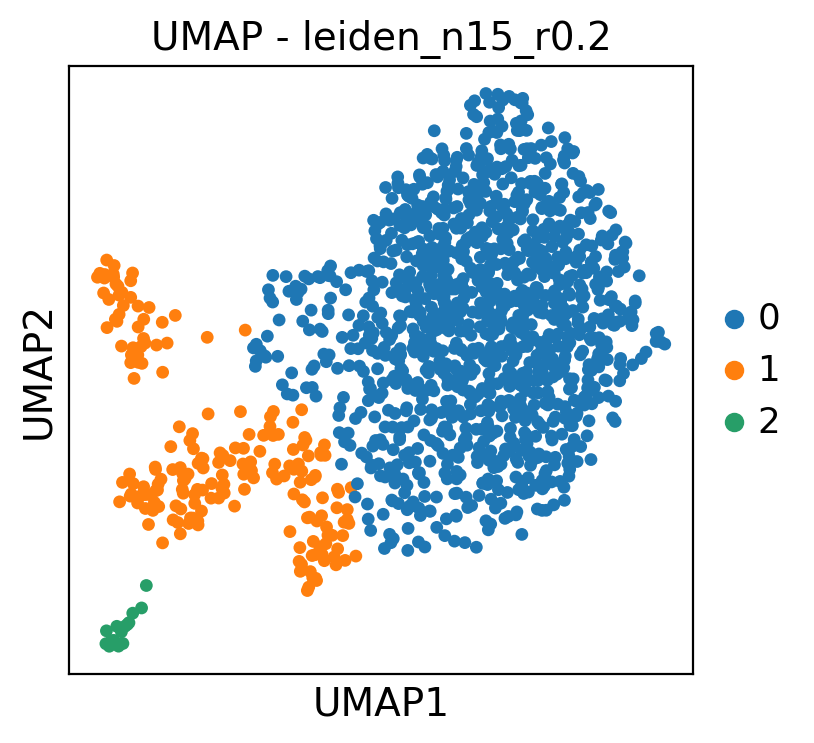

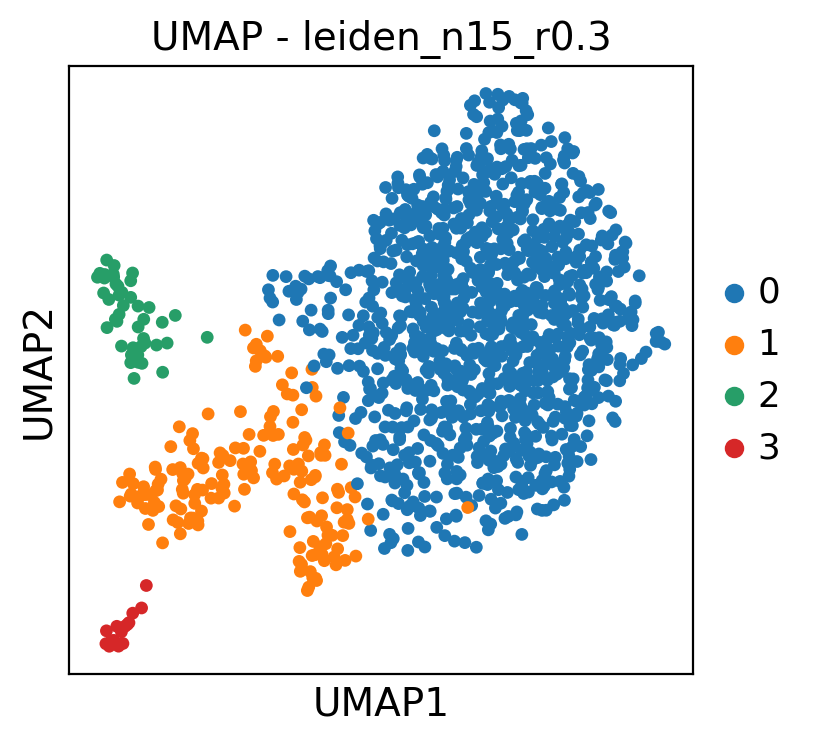

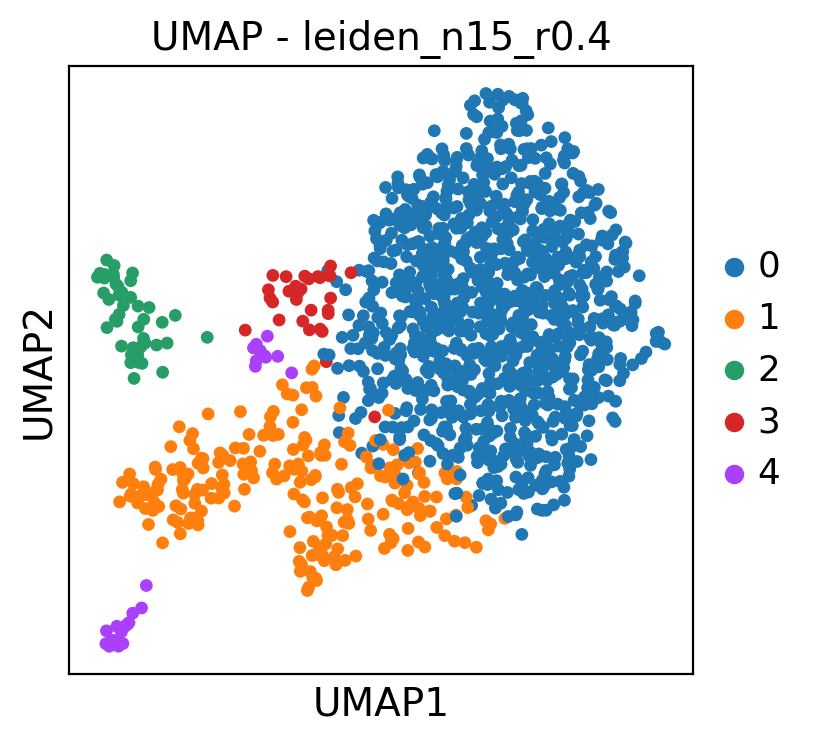

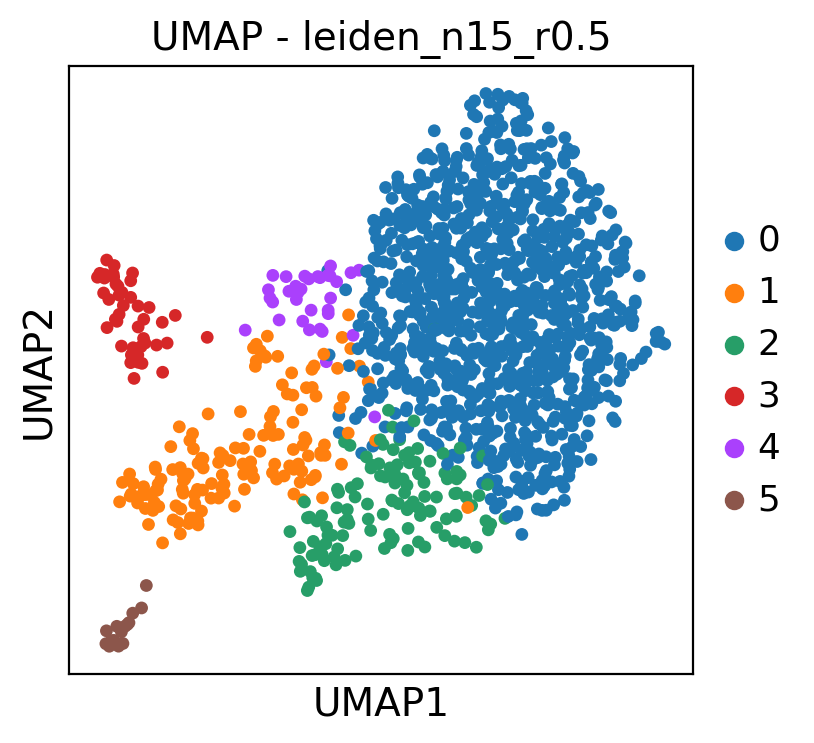

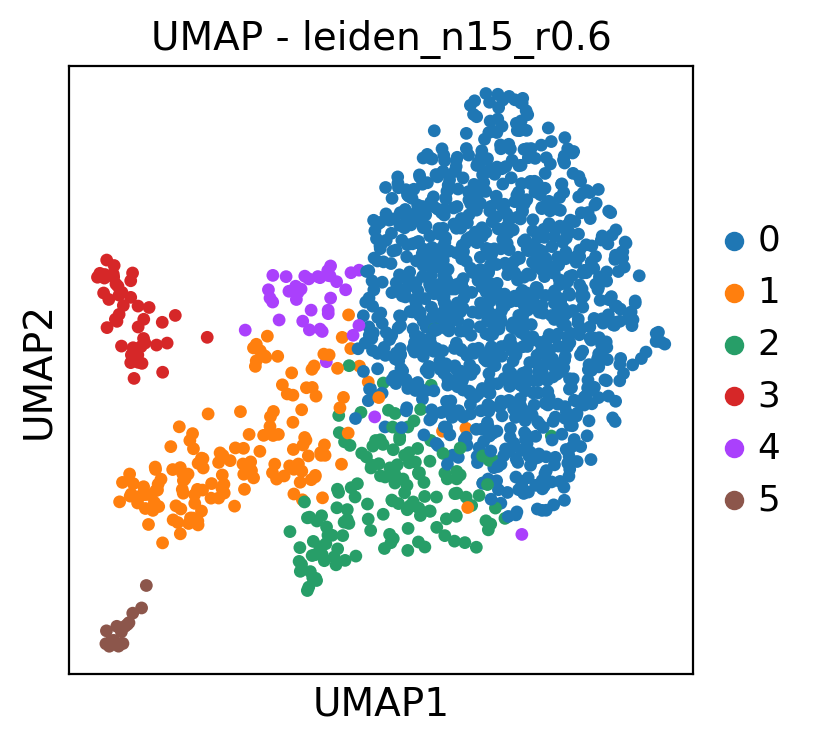

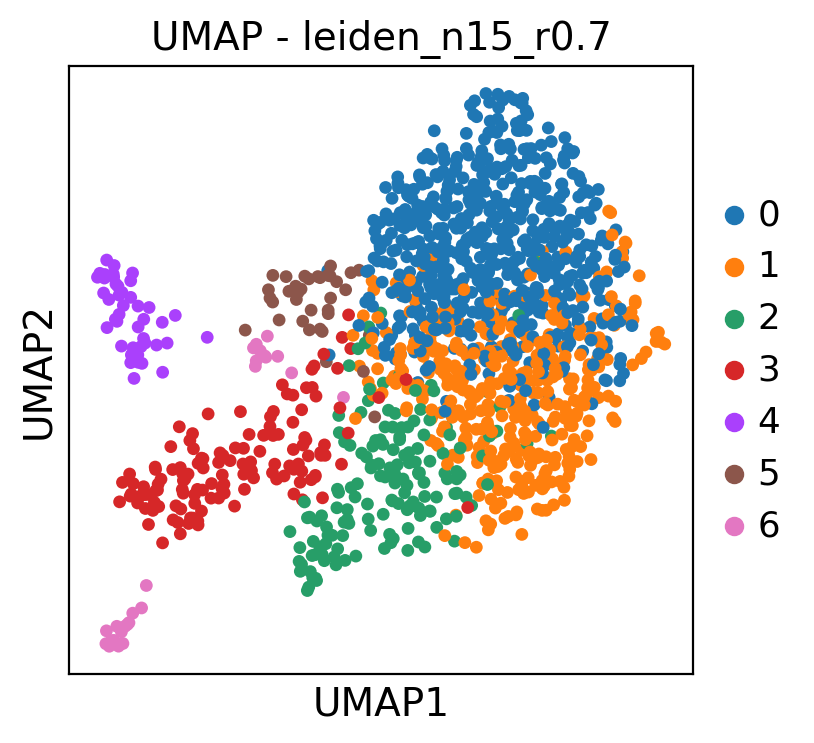

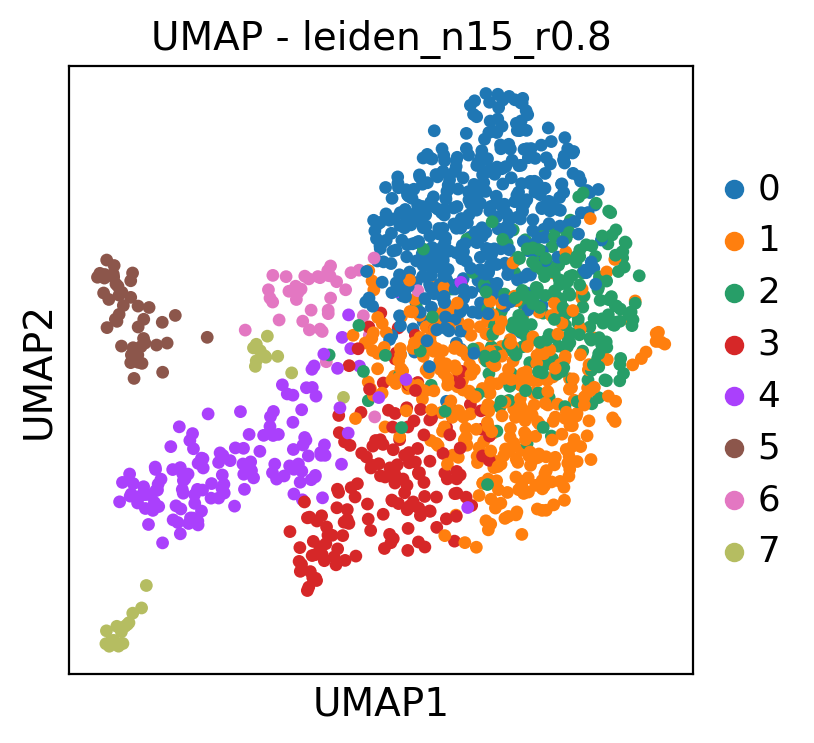

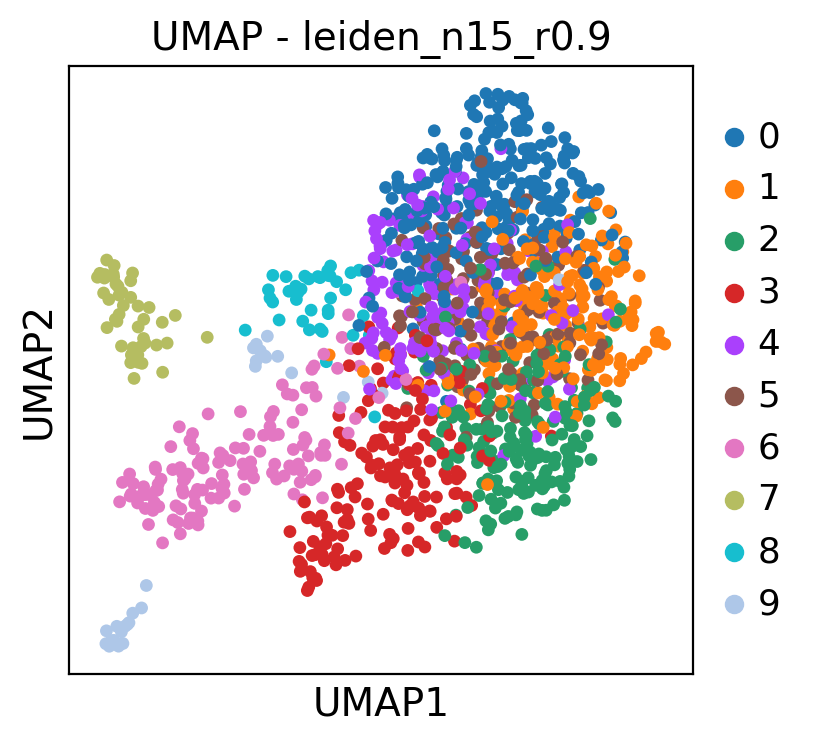

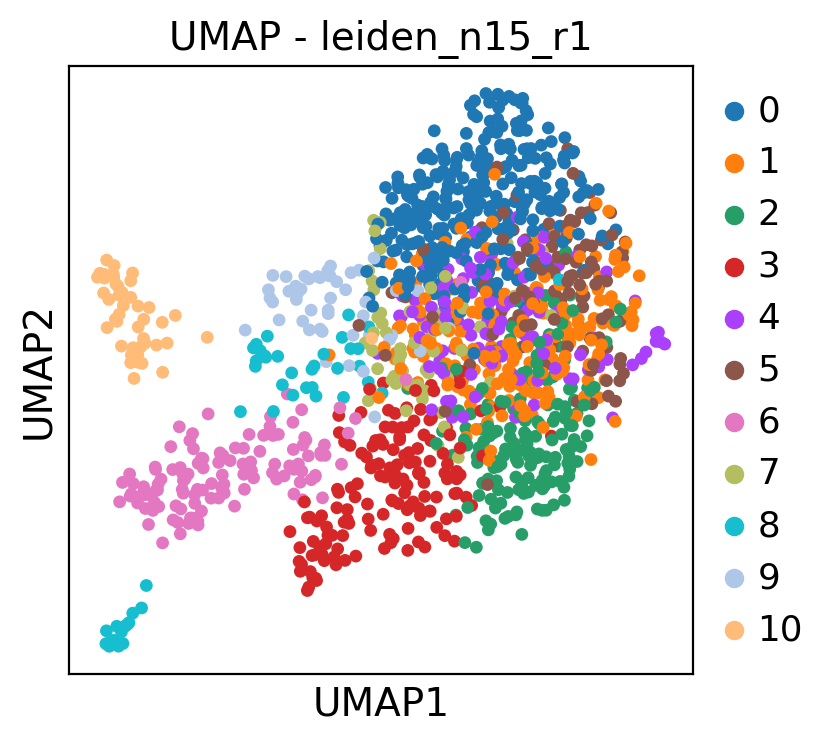

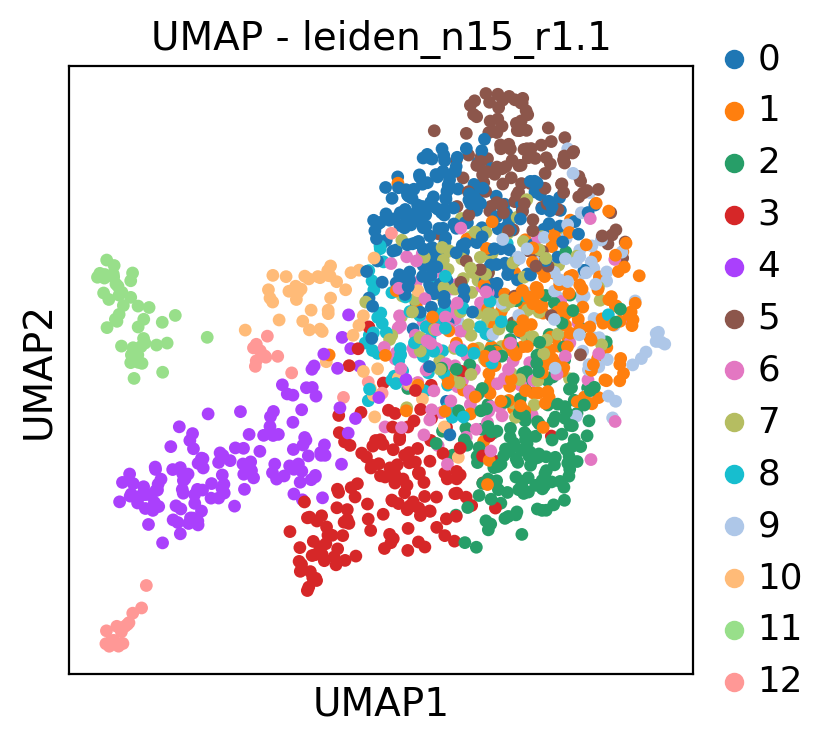

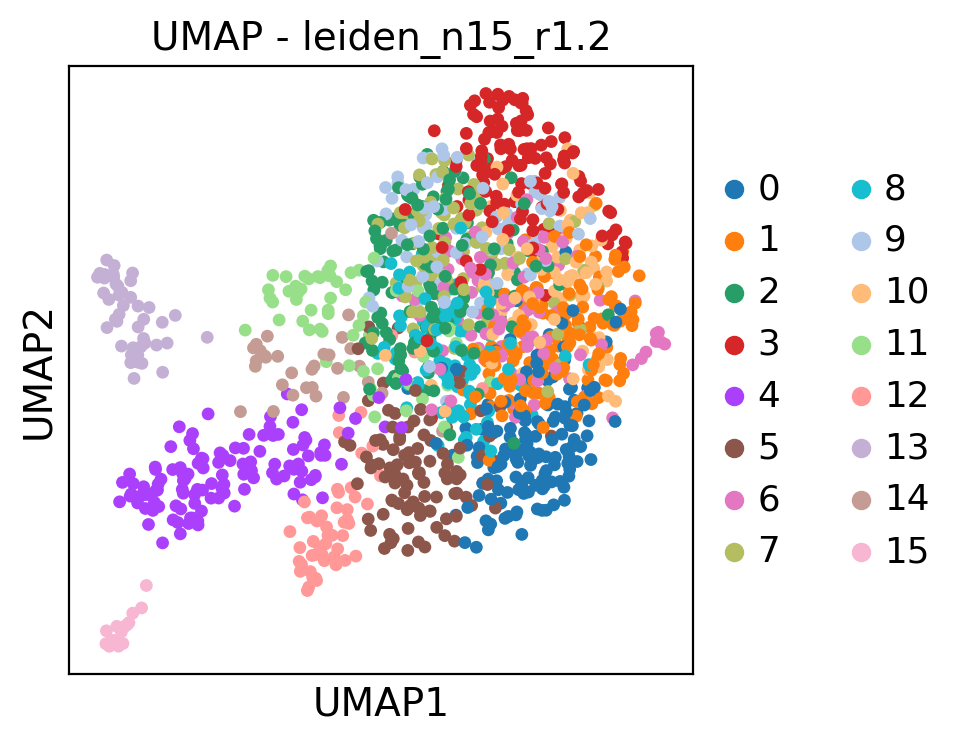

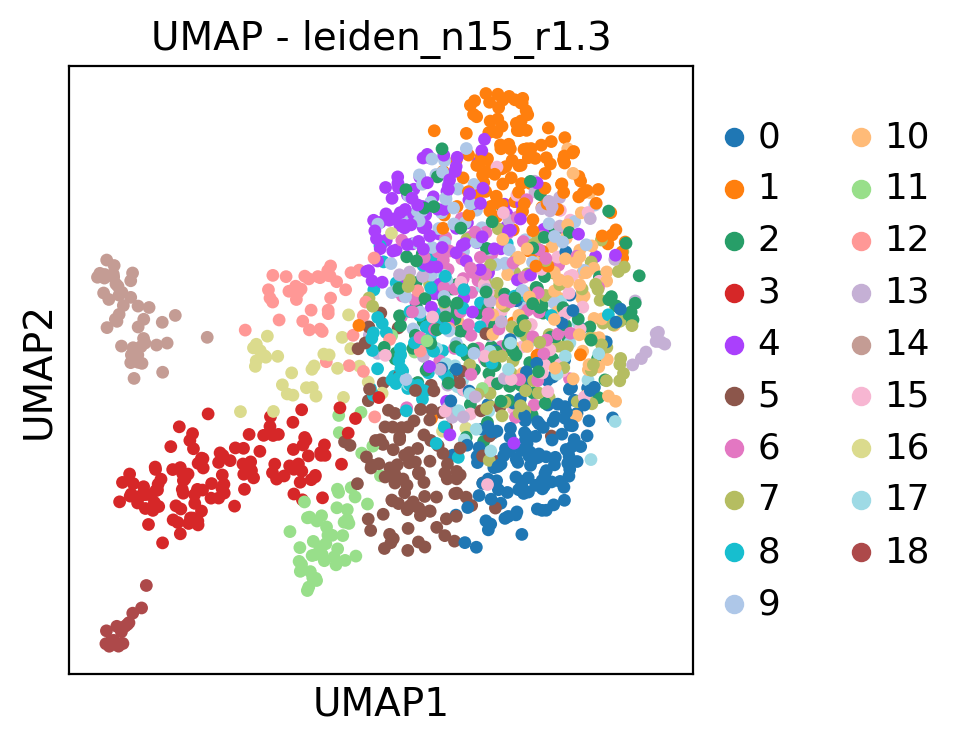

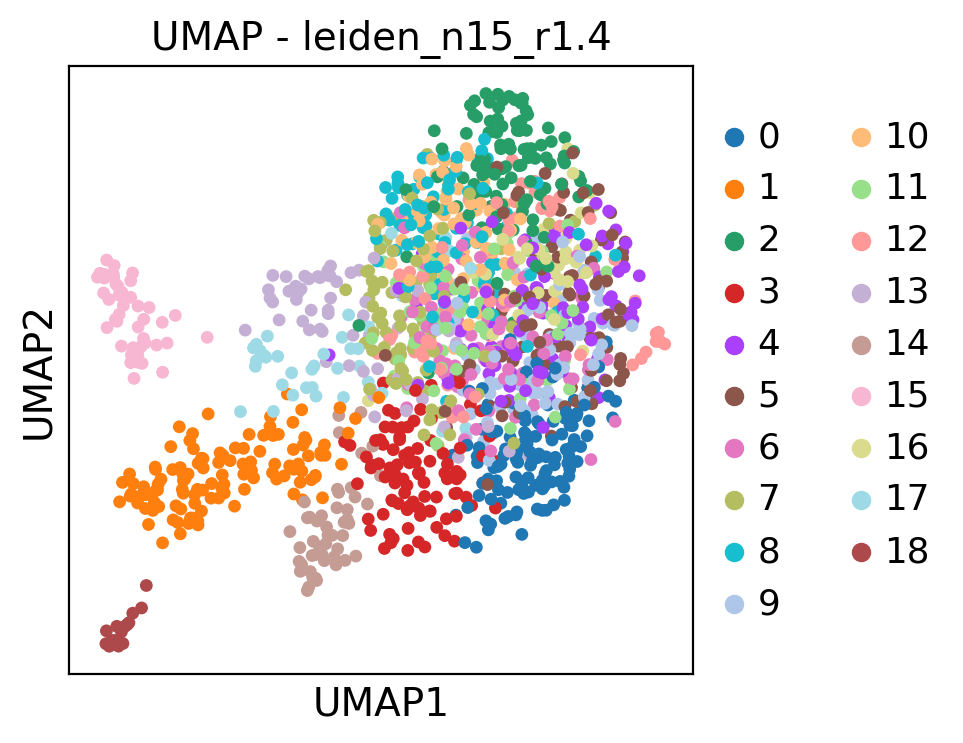

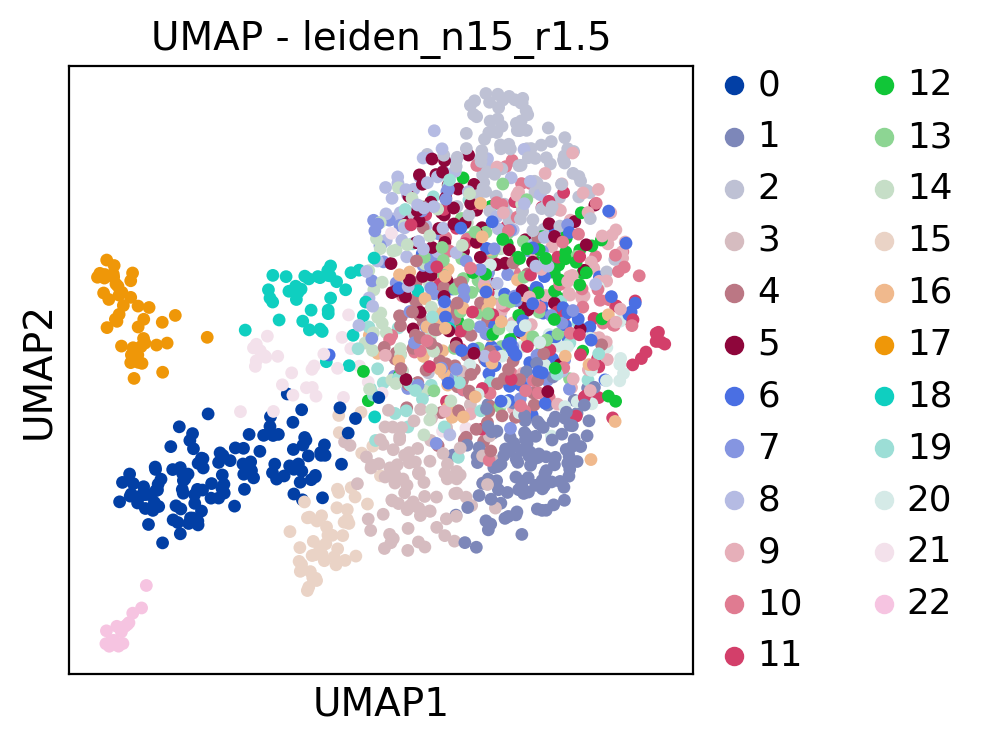

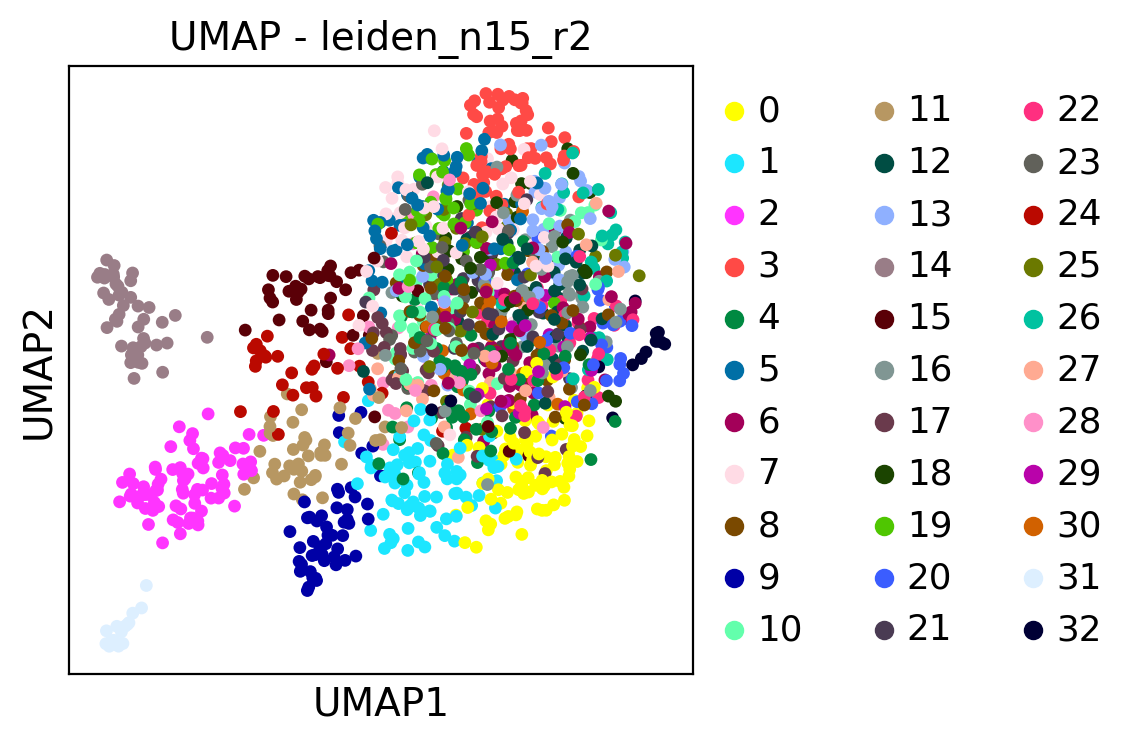

In [21]:
# TODO: Visualize the UMAP colored by each resolution
# Your code here


for resolution in different_reso:
    ax = sc.pl.umap(adata, color=resolution, title=f"UMAP - {resolution}", return_fig= True)




#Show true or false or return_fig=True? 

#For example, from embedding plots (such as umap) we can obtain either axes (by setting show=False) or the whole figure 
#(by setting return_fig=True) that stores axes in figure.axes. For every plotted category one Axes object will be created and
#for every continuous category two Axes objects: the UMAP plot and colorbar on the side. However, if we want to obtain the colorbar axes 
#object we need to use return_fig=True rather than show=False. When accessing Axes from Figure the returned object is a list and we need to
#select the relevant Axes to modify them. When returning Axes directly (e.g. with show=False) we obtain either an individual Axes object 
#(if this is the only Axes object on the Figure) or a list of Axes (if multiple Axes were created).

## 2. Identifying marker genes and cell types

#### *The results acquired here will be included in the report*  
  
From the cluster visualizations above pick one that indicates to low resolution, to high resolution and one with a good resolution.  
Justify and discuss each one of the 3 choices in your report. 

bad reso: min one? 0.3
low reso: max one? 1

good reso: 0.5 or 0.7, final one 0.5

diferença é que o main cluster é dividido em dois e que o cluster do canto inferior esquerdo passa a se compor com umas samples no meio do mapa, o que se repete ao longo das analises
0.6 não pq começa a pegare samples pretencentes ao mesmo cluster que por sua vez esta isolado noutro lugar, oq n faz muito sentido
mas como msm mais pafra a frente a divisão do cluster principal não é uniforme e acertiva, faz sentido a gente fazer uma primeira analise como um todo.
pegando o 0.5 como resposta final, é de interesse ver os genes do cluster 1 em relaçaõ ao cluster 5 pois existem algumas do 1 que podem expressar os mesmos genes do 5

#### From now on, you will use the resolution you chose as the best one to answer the questions on the following points!

### 2.1 Differential Gene Expression (DGE) analysis

Perform DEG analysis on the resolution of choice.  
Hint: use *scanpy.tl.rank_genes_groups* function and note that the output of the function is in .uns dataframe inside adata.  
https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.rank_genes_groups.html

In [22]:
# Complete the function as needed to perfom DGE analysis
# Note use wilcoxon method
#sc.tl.rank_genes_groups(use_raw=False, pts=True)

sc.tl.rank_genes_groups(adata, groupby='leiden_n15_r0.5', method='wilcoxon', use_raw=False, pts=True)



ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


You never saved adata before. Since we are storing DEG info inside adata (and it take a while to run), you can save adata at this point and load it form this point in the code too!  
  
This avoids always running the same code over and over again.

In [23]:
#print(adata.uns['rank_genes_groups'])

print(adata.uns['rank_genes_groups'].keys())

print(pd.DataFrame(adata.uns['rank_genes_groups']['names']))
print(pd.DataFrame(adata.uns['rank_genes_groups']['scores']))
print(pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges']))
print(pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj']))
print(pd.DataFrame(adata.uns['rank_genes_groups']['pts']))


#??? where

# Example
# DataFrame cluster 0: cols=[scores, logfoldchange, padj, pts], index=[ordered genes of cluster 0]

# Select genes with padj<0.05 (mask)
# Highest LogFC (sort)
# Save in a dictionary a list of the top 5 gene per cluster


dict_keys(['params', 'pts', 'pts_rest', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])
              0         1       2         3        4         5
0        Plxdc2      Rbpj   Gpnmb  Arhgap15   Rnf213    Diaph3
1          Nav2     F13a1   Fnip2     Trps1   Parp14     Top2a
2         Csmd3  Arhgap15  Osbpl8      Pid1  Trim30a      Smc4
3          Nav3      Mrc1  Lgals3     Ptprc    Stat1     Kif11
4         Tanc2      Pid1   Myo1e      Cd74    Tmcc3     Mki67
...         ...       ...     ...       ...      ...       ...
20896    Iqgap1      Nav3   Pcdh9     Ophn1    Unc5c       Dst
20897     Trps1   Epb41l2   Tanc2      Hexb     Pak1      Tns3
20898    Iqgap2      Hexb    Nav3     Mertk    Zfhx3     Hpgds
20899      Pid1    Plxdc2  Srgap2      Nav2   Tnrc6b     Rims1
20900  Arhgap15      Nav2   Csmd3    Plxdc2     Ssh2  Rap1gds1

[20901 rows x 6 columns]
               0          1          2          3         4         5
0      15.354797  12.741084  13.535468  10.18308

In [24]:
print(adata.uns['rank_genes_groups']['pts'].loc['Nav2'])


0    0.914367
1    0.489655
2    0.898438
3    0.340909
4    0.882353
5    0.722222
Name: Nav2, dtype: float64


In [25]:

dge_results = adata.uns['rank_genes_groups']

# Extracting values to DataFrames
gene_names = pd.DataFrame(dge_results['names'])
logfoldchanges = pd.DataFrame(dge_results['logfoldchanges'])
pvals_adj = pd.DataFrame(dge_results['pvals_adj'])
scores = pd.DataFrame(dge_results['scores'])
pts = pd.DataFrame(dge_results['pts'])


cluster_dfs = {}


for i in range(len(gene_names.columns)): #for loop to take the nr of columns
    
    gene_reindex = gene_names.iloc[:, i] # take the correct order of genes names
    
    pts_reindexed = pts.iloc[:, i].reindex(gene_reindex.values) # Reindex the pts
    
    cluster_df = pd.DataFrame({ # creates a df that takes all the data corresponding to the cluster in loop
        'score': scores.iloc[:, i].values,
        'logfoldchange': logfoldchanges.iloc[:, i].values,
        'pvals_adj': pvals_adj.iloc[:, i].values,
        'pts': pts_reindexed.values}, 
        index=gene_reindex.values)
    # cluster_df.index.name = 'gene'
    cluster_dfs[f'Cluster_{i}'] = cluster_df    # append it to the dictionary

# print
for cluster, df in cluster_dfs.items():
    print(f"\n{cluster}:")
    print(df.head())


Cluster_0:
            score  logfoldchange     pvals_adj       pts
Plxdc2  15.354797       1.542248  6.875109e-49  0.963844
Nav2    14.900744       1.641987  3.406122e-46  0.914367
Csmd3   13.860790       1.374485  7.626259e-40  0.936251
Nav3    13.218372       1.478867  2.394394e-36  0.880114
Tanc2   11.815781       1.103573  9.660100e-29  0.920076

Cluster_1:
              score  logfoldchange     pvals_adj       pts
Rbpj      12.741084       3.331867  3.652474e-33  0.806897
F13a1     12.663930       5.617543  6.527325e-33  0.668966
Arhgap15  11.858295       2.223494  8.147349e-29  0.855172
Mrc1      11.760303       5.872871  2.177537e-28  0.613793
Pid1      10.886489       2.032416  3.991943e-24  0.855172

Cluster_2:
            score  logfoldchange     pvals_adj       pts
Gpnmb   13.535468       3.941209  2.018304e-37  0.820312
Fnip2   11.437079       2.003388  2.852142e-26  0.929688
Osbpl8  11.397421       1.954045  3.000612e-26  0.890625
Lgals3  11.067274       3.149821  9.4481

In [26]:
# Filter, sort, and select top 5 genes per cluster
top_genes_cluster = {}

for cluster, df in cluster_dfs.items():
    filtered_df = df.mask(df['pvals_adj'] >= 0.05) # padj < 0.05
    sorted_df = filtered_df.sort_values(by='logfoldchange', ascending=False) # orders by fold change
    top_genes = sorted_df.head(5) # top 5 genes
    
    top_genes_cluster[cluster] = top_genes # Assigns the DataFrame (top_genes) to the key cluster in the dictionary top_genes_per_cluster.

# # print 
# for cluster, df in top_genes_per_cluster.items():
#     print(f"\nTop genes in {cluster}:")
#     print(df)


# append the genes to a full list in cluster order, every 5 genes is a cluster
top_genes = []

for cluster, df in top_genes_cluster.items():
    for gene in df.index:
        top_genes.append(gene)


print("\nTop genes per cluster:")
print(top_genes)


Top genes per cluster:
['Capn3', 'Siglech', 'Sall1', 'Col27a1', 'Rab6b', 'Cd163', 'Lyve1', 'Timd4', 'Mrc1', 'F13a1', 'Gpnmb', 'Atp6v0d2', 'Anpep', 'Stra6l', 'Epas1', 'Gm15987', 'Gpr141', 'Plbd1', 'Dpp4', 'Ciita', 'Ifi209', 'Phf11d', 'Oasl2', 'Usp18', 'Ifi204', 'Top2a', 'Kif11', 'Cenpf', 'Mki67', 'Neil3']


In [27]:
# Complete the code to save and load adata_deg.
save_path = '/home/mako/PE/adata_deg.h5ad'
adata.write_h5ad(save_path, compression='gzip')

adata_deg = sc.read_h5ad(save_path)
print(adata_deg)    # To confirm the file has the DGE data stored inside


AnnData object with n_obs × n_vars = 1420 × 20901
    obs: 'injury', 'day', 'collection_region', 'injury_day', 'injury_region', 'injury_condition', 'nuclei_uL', 'total_nuclei', 'target_10x', 'mouse_id', 'date_nuclei_extraction', 'sample_id', 'sample_I15AC', 'sample_I15AR', 'sample_I15BC', 'sample_I15CC', 'sample_I15CR', 'sample_I60AC', 'sample_I60AR', 'sample_I60BC', 'sample_I60BR', 'sample_I60CC', 'sample_I60CR', 'sample_S15AC', 'sample_S15BC', 'sample_S15BR', 'sample_S15CC', 'sample_S15CR', 'sample_U00AX', 'sample_U00BX', 'sample_U00CX', 'n_counts', 'filt_counts', 'n_genes', 'filt_genes', 'percent_mito', 'filt_mito', 'doublet_score', 'predicted_doublet', 'doublet', 'annot_lineage_cell', 'leiden_n15_r0.1', 'leiden_n15_r0.2', 'leiden_n15_r0.3', 'leiden_n15_r0.4', 'leiden_n15_r0.5', 'leiden_n15_r0.6', 'leiden_n15_r0.7', 'leiden_n15_r0.8', 'leiden_n15_r0.9', 'leiden_n15_r1', 'leiden_n15_r1.1', 'leiden_n15_r1.2', 'leiden_n15_r1.3', 'leiden_n15_r1.4', 'leiden_n15_r1.5', 'leiden_n15_r2', 'G

### 2.2 Finding marker genes

DGE analysis allows you to determine the most expressed genes in each cluster compared to all the others.  
   
The genes that are more expressed in a cluster are good candidates to be the marker genes of that cluster, i.e, a minumum set of genes that is exclusive (or almost exclusive) to that cluster and thus could tell you about the biological function of that cluster.

Use Scanpy function *rank_genes_groups_dotplot* to plot the DGE value (log fold chage) you got stored in adata form the previous exercise. Plot the top 5 best scored genes.  
Hint: https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.rank_genes_groups_dotplot.html

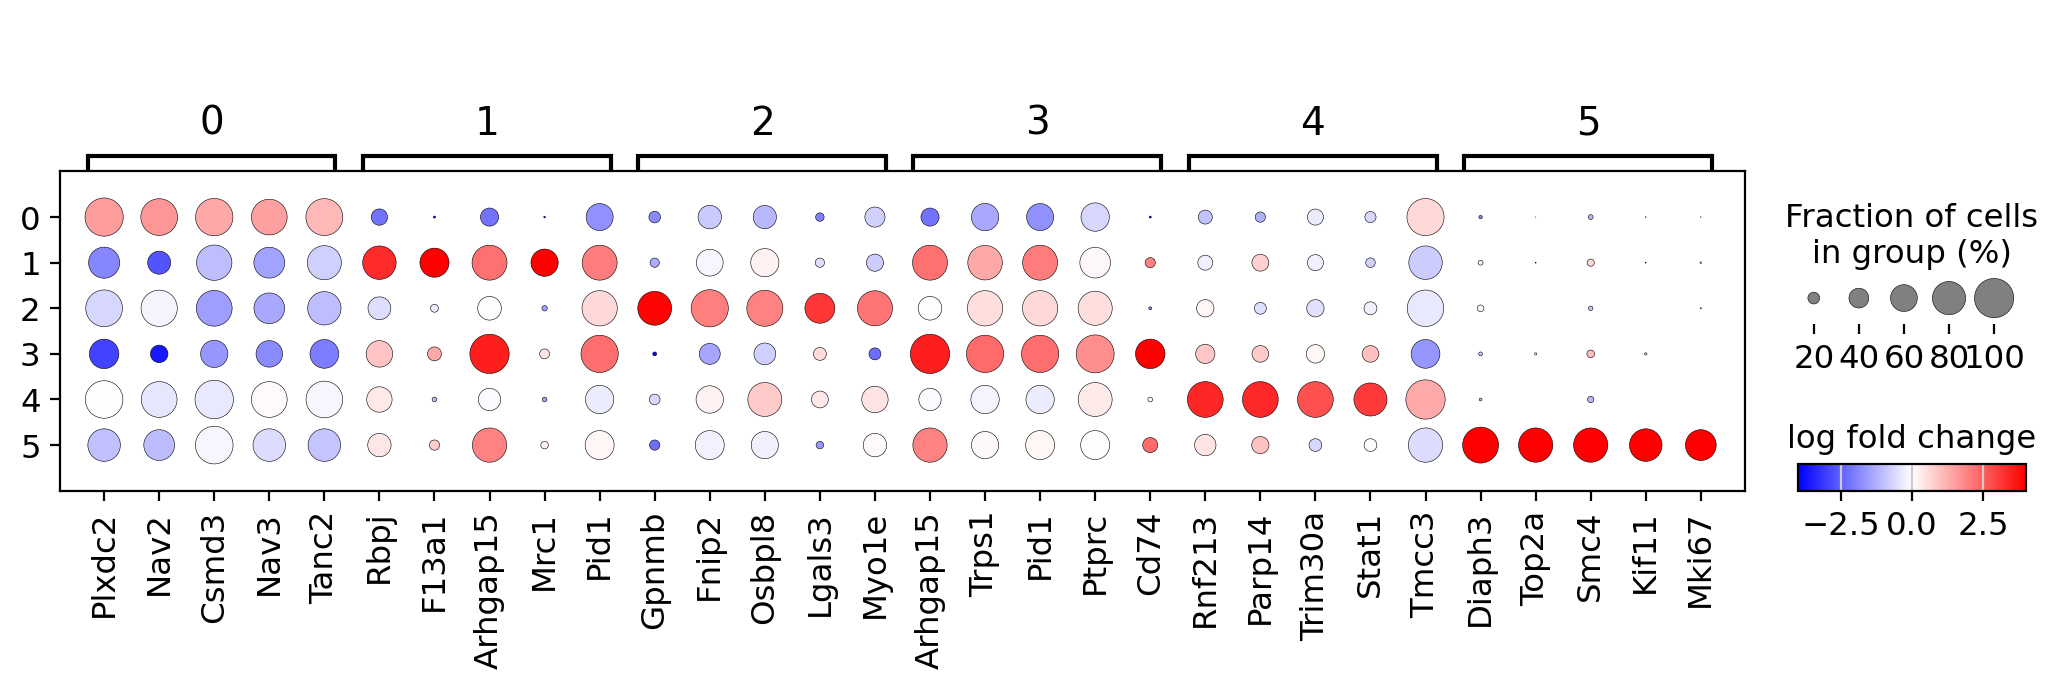

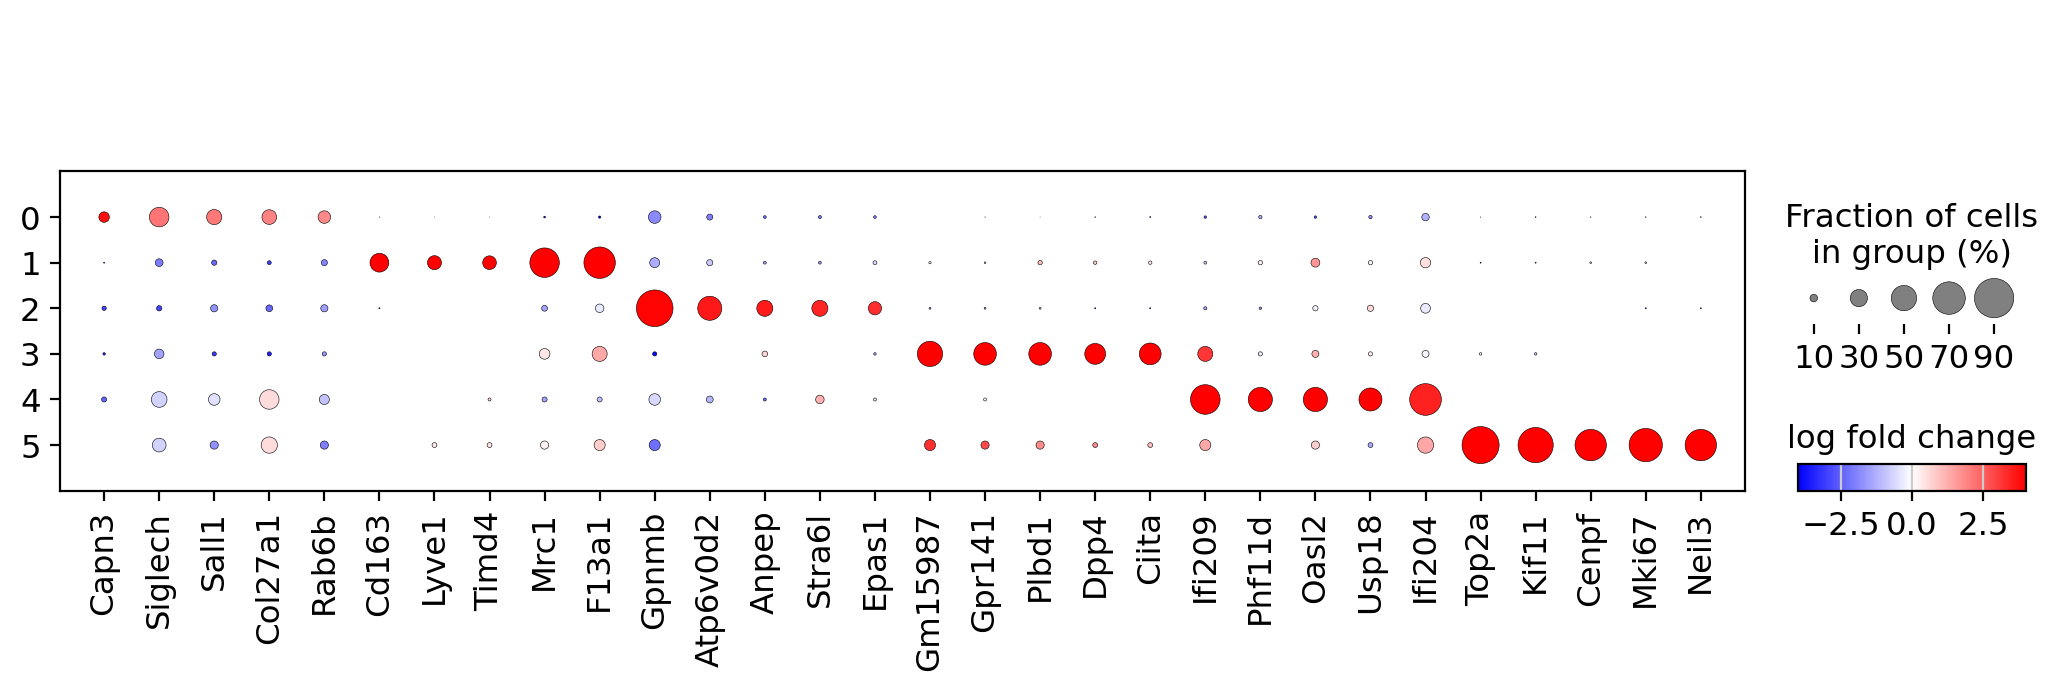

In [28]:


sc.pl.rank_genes_groups_dotplot(
    adata_deg,
    n_genes=5,
    cmap='bwr',
    vmin=-4,
    vmax=4,
    values_to_plot = 'logfoldchanges',
    #var_names = ['Arhgap15','Parp14','Diaph3'],
    #min_logfoldchange=1,
    colorbar_title='log fold change',
    use_raw=False,
    dendrogram=False,
    show=True
)

sc.pl.rank_genes_groups_dotplot(
    adata_deg,
    var_names=top_genes,
    #groupby='leiden_n15_r0.5',
    cmap='bwr',
    vmin=-4,
    vmax=4,
    values_to_plot='logfoldchanges',
    #min_logfoldchange=1,
    colorbar_title='log fold change',
    use_raw=False,
    dendrogram=False,
    show=True
)

In [29]:
print(sc.logging.print_header())

scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.23.5 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 pynndescent==0.5.12
None


### 2.3 Report questions and aims  

Hopefully you should have got a good list of 5 markers to explore further. From previous data we know that the Immune data set you are working on contains microglia/macrophages only.    
For your report you should try to answer the following questions based on the list of genes you got:  
1. Is there any cluster defining immune-activated microglia/macrophages? Which one(s) and why?
2. Is there any cluster defining dividing/cycling cells? Which one(s) and why?
  
(For this part you may not need code, but instead search the literature for the function of the markers you got)

### Awnser:

1. Cluster 0 Marker: Capn3
2. Cluster 1 Marker: Rbpj/F13a1 -
3. Cluster 2 Marker: Gpnmb -
4. Cluster 3 Marker: Arhgap15/Cd74 -
5. Cluster 4 Marker: Rnf213
6. Cluster 5 Marker: Diaph3

### Questions:

1. Capn3 (Calpain-3) - calpain-3 attaches to proteins involved in controlling the ability of muscle fibers to stretch  and in cell signaling. Muscle-specific calpain that has important roles in the promotion of calcium release from skeletal muscle fibers, calcium uptake of sarcoplasmic reticulum, muscle formation and muscle remodeling. Recessive mutations in CAPN3 cause limb-girdle muscular dystrophy (MD) type 2A and other types of MD. Ou seja é envolvido nas doenças pathogenicas. 10.3892/ijmm.2021.5036

2. Rbpj: (Recombination signal binding protein for immunoglobulin kappa J region) - The RBPJ gene provides instructions for making a protein called RBP-J, which is an integral part of a signaling pathway known as the Notch pathway. Notch signaling controls how certain types of cells develop in the growing embryo, including those that form the bones, heart, muscles, nerves, and blood. Signaling through the Notch pathway stimulates the RBP-J protein to attach (bind) to specific regions of DNA and control the activity of genes that play a role in cellular development. Its involvement in Notch signaling can influence the activation and function of microglia. https://www.ncbi.nlm.nih.gov/gene/19664. doi/10.1111/acel.13295 

3. F13a1: Encodes the coagulation factor XIII A subunit. Coagulation factor XIII is the last zymogen to become activated in the blood coagulation cascade. Plasma factor XIII is a heterotetramer composed of 2 A subunits and 2 B subunits. The A subunits have catalytic function, and the B subunits do not have enzymatic activity and may serve as plasma carrier molecules. https://doi.org/10.3390/ijms21218289. https://www.ncbi.nlm.nih.gov/gene/2162

4. Gpnmb: (Glycoprotein non-metastatic melanoma protein B). Tissue repair and inflammation. GPNMB was originally identified as a gene that was expressed in poorly metastatic human melanoma cell lines and xenografts and not expressed in highly metastatic cell lines. However, several recent studies have identified high GPNMB expression in aggressive melanoma, glioma, and breast cancer specimens. GPNMB has been reported to be expressed in various cell types, including: melanocytes, osteoclasts, osteoblasts, dendritic cells, and it is overexpressed in various cancer types.

5. Arhgap15: Regulates lung cancer cell proliferation and metastasis via the STAT3 pathway. ARHGAP15 might serve as a tumor suppressor during colorectal cancer progression. ARHGAP15 expression was significantly correlated with clinical stage, tumor size metastasis, vital status, and overall survival of CRC patients. ARHGAP15 overexpression inhibited cell growth, migration, and invasion of HT29 and RKO cells in vitro, whereas opposite results were observed in ARHGAP15-silenced LoVo cells. https://www.nature.com/articles/s41419-018-0707-6

6. Cd74: Leukocyte differentiation antigen 74. CD74 has recently been shown to be a receptor for the macrophage migration inhibitory factor family proteins (MIF/MIF2). Many studies have revealed that CD74 plays an important role in cardiovascular disease. 10.3389/fcvm.2022.1049143

7. Rnf213:  Ring finger protein 213.  modulates gamma-herpesvirus infection and reactivation via targeting the viral Replication and Transcription Activator. This gene encodes a protein containing a C3HC4-type RING finger domain, which is a specialized type of Zn-finger that binds two atoms of zinc and is thought to be involved in mediating protein-protein interactions. translocation partner in anaplastic large cell lymphoma and inflammatory myofibroblastic tumor cases. https://www.ncbi.nlm.nih.gov/gene/57674. RNF213 mutations affect the pathogenesis of moyamoya disease. 10.1093/brain/awad225 

8. Diaph3: capacity to nucleate and elongate actin filaments and, therefore, to remodel the cytoskeleton. Essential for cytokinesis as its dysfunction impairs the contractile ring and produces multinucleated cells.  https://doi.org/10.7554/eLife.61974


### 2.4 Bonus questions  

1. We can hypothesize the cluster containing activated cells should be enriched for cells originating in injured mice. Can you confirm if this is true?   
Hint: you have metadata that tells you from which condition each cell came from. You can determine the percent of cells coming form injured mice in the 'injury cluster' you found and compare with the precentage of cells coming form injured mice when you look at the data set as a whole (no clusrter selection).  
  
2. How about the cycling cluster?





In [27]:
# Bonus questions code here